In [21]:
import delfi.distribution as dd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

import scipy as sp

#from delfi.inference import Basic, CDELFI
from CDELFI import CDELFI
from delfi.generator import Default
from delfi.utils.viz import probs2contours
from util import *
from sim_gauss import *
from sumstat_mean import *

import pickle

from parameters import ParameterSet

%matplotlib inline

In [27]:
params = ParameterSet({})

params.ndim = 2  # dimensionality of problem
params.n_comps = 5  # number of components

params.x_width = 4

params.dof = params.ndim
params.scale = 1
params.alpha = 1

In [28]:
target_a = np.random.dirichlet(params.alpha * np.ones(params.n_comps))
target_mus = np.random.uniform(-params.x_width, params.x_width, size=(params.n_comps, params.ndim))

target_Sgen = sp.stats.invwishart(df=params.dof, scale=params.scale * np.eye(params.ndim))
target_Ss = target_Sgen.rvs(size=params.n_comps)

params.target = dd.MoG(target_a, target_mus, target_Ss)

In [29]:
def print_pdf(pdf, name):
    po = np.get_printoptions()
    np.set_printoptions(precision=2)
    print("{}:".format(name))
    print("----------------")
    print("Mixture weights: {}".format(pdf.a))
    print("Means:")
    for x in pdf.xs:
        print("{}".format(x.m))
    print()
    print("Covariances:")
    for x in pdf.xs:
        print("{}".format(x.S))
    print()
    np.set_printoptions(**po)

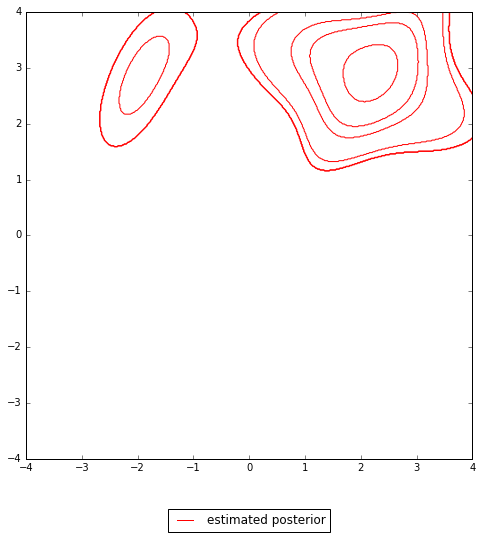

Target distribution:
----------------
Mixture weights: [ 0.2   0.09  0.35  0.14  0.22]
Means:
[-2.01  2.7 ]
[-3.93 -3.13]
[ 2.2   2.59]
[ 1.67  3.43]
[ 2.43  3.12]

Covariances:
[[ 0.82  0.77]
 [ 0.77  2.24]]
[[ 1.8  -0.36]
 [-0.36  0.4 ]]
[[ 2.74 -0.75]
 [-0.75  0.82]]
[[ 0.87 -0.14]
 [-0.14  0.41]]
[[ 1.04  1.26]
 [ 1.26  2.2 ]]



In [30]:
# visualize results
res = 500
xlims = (-params.x_width, params.x_width)
ylims = xlims

xaxis = np.linspace(*xlims, res)
yaxis = np.linspace(*ylims, res)
x, y = np.meshgrid(xaxis, yaxis)

xy = np.concatenate([x.reshape([-1, 1]), 
                     y.reshape([-1, 1])], 
                    axis=1)


levels = [0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

target_contour = probs2contours(params.target.eval(xy, log=False), levels).reshape(res, res)

plt.figure(figsize=(8, 8))

plt.contour(x, y, target_contour, colors=('r'))

red_line = mlines.Line2D([], [], color='r', label='estimated posterior')
plt.legend(handles=[red_line], 
           loc=9, bbox_to_anchor=(0.5, -0.1))

plt.show()

print_pdf(params.target, 'Target distribution')

In [31]:
pickle.dump(params, open('example_mog.pkl', 'wb'))